In [1]:
import os; os.environ['KERAS_BACKEND'] = 'mxnet'
import mxnet as mx
import numpy as np
import keras as k

Using MXNet backend


In [2]:
SHAPE=(224, 224, 3)
CLASSES=4

import helpers.labelinputgenerator
data = helpers.labelinputgenerator.LabelInputGenerator("train", SHAPE, CLASSES, batch_size=1)

In [3]:
count = dict()
for _, label in data:
    label = label[0] # because it's delivered in patches
    bin = label[0] + 2*label[1] + 4*label[2] + 8*label[3]
    if bin not in count:
        count[bin] = 0
    count[bin] += 1


In [6]:
x = np.zeros(16)
y = np.zeros(16)
label = list()

for i in range(16):
    x[i] = i
    y[i] = 0
    if i in count:
        y[i] = count[i]
    label.append('{0:04b}'.format(i))

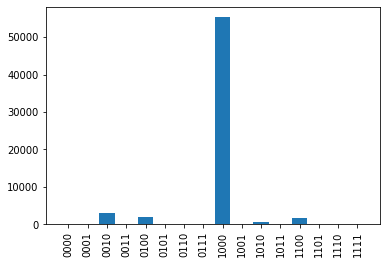

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('ggplot')

plt.bar(x, y)
# plt.xlabel("Energy Source")
# plt.ylabel("Energy Output (GJ)")
# plt.title("Energy output from various fuel sources")

plt.xticks(x, label, rotation='vertical')

plt.show()